# Table of Contents
1. **Overview**
2. **Import Basic Libraries**
3. **Exploratory Data Analysis**
4. **Feature Engineering**
5. **Modelling**
6. **Conclusion**

## Overview
This dataset consists of over 60 000 sales made by Durban Fresh Produce Market.

For this Predict, you will need to use this data to predict the average price per kilogram of Golden Delicious Apples


###   Data Fields
> 1. Province - Which province the produce was grown
> 2. Container - The code for the type of container
>3.Size_Grade - The class of the produce according to their quality
>4.Weight_Kg - The total weight in kilograms
>5.Commodities - The type of produce, e.g. Golden Delicious Apples
>6.Date - The date of the sale
>7.Sales_Total - The total sales price
>8.Total_Qty_Sold - The number of produce sold
>9.Total_Kg_Sold - The total weight of the produce sold in kilograms
>10.Stock_On_Hand - The amount of produce the store has



##  Import Basic Libraries

In [1]:
#Let's import some of the basic libraries we'll be using.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##  Exploratory Data Analysis
We'll try to focus on the following:

**1. Missing Data**  
**2. Numerical/Categorical Features**  
**3. Outliers present in the dataset**  
**4. Factors influencing the avg_price_per_kg(target variable)**

In [2]:
#Let's have a look at our training and test data
#Our training and test data have the same number of features except the target SalePrice is not present in the test dataset.
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")
df_test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [3]:
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
df_train_filter = df[df['Commodities']== 'APPLE GOLDEN DELICIOUS']
df_train = df_train_filter.copy()
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [5]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [6]:
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column      

In [7]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [8]:
df_test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [9]:
print(df_train.shape,df_test.shape)

(1952, 13) (685, 13)


###  Missing Data

In [10]:
#Let's see the number of missing values in every feature for training dataset.
features = df_train.columns
for feature in features:
    print(feature,':',df_train[feature].isnull().mean()*100,'% missing values')

Province : 0.0 % missing values
Container : 0.0 % missing values
Size_Grade : 0.0 % missing values
Weight_Kg : 0.0 % missing values
Commodities : 0.0 % missing values
Date : 0.0 % missing values
Low_Price : 0.0 % missing values
High_Price : 0.0 % missing values
Sales_Total : 0.0 % missing values
Total_Qty_Sold : 0.0 % missing values
Total_Kg_Sold : 0.0 % missing values
Stock_On_Hand : 0.0 % missing values
avg_price_per_kg : 0.0 % missing values


In [11]:
#Similarly for the test dataset.
features = df_test.columns
for feature in features:
    print(feature,':',df_test[feature].isnull().mean()*100,'% missing values')

Index : 0.0 % missing values
Province : 0.0 % missing values
Container : 0.0 % missing values
Size_Grade : 0.0 % missing values
Weight_Kg : 0.0 % missing values
Commodities : 0.0 % missing values
Date : 0.0 % missing values
Low_Price : 0.0 % missing values
High_Price : 0.0 % missing values
Sales_Total : 0.0 % missing values
Total_Qty_Sold : 0.0 % missing values
Total_Kg_Sold : 0.0 % missing values
Stock_On_Hand : 0.0 % missing values


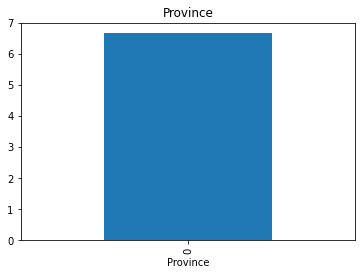

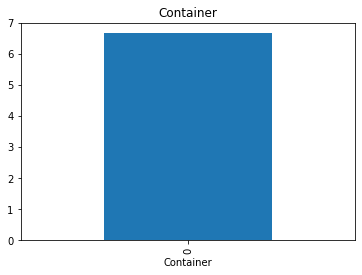

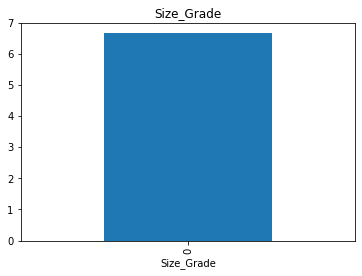

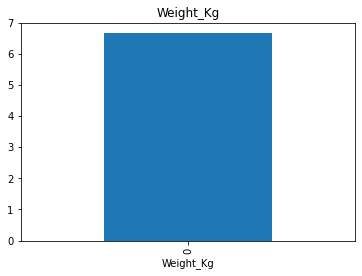

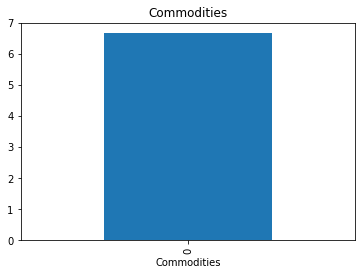

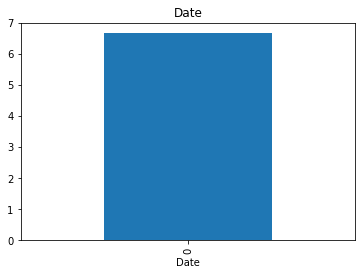

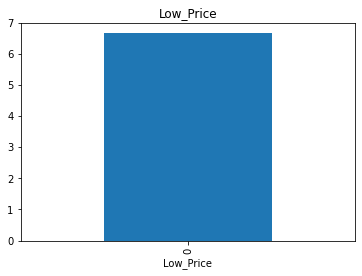

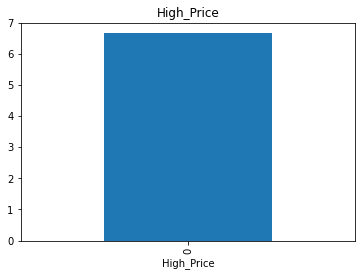

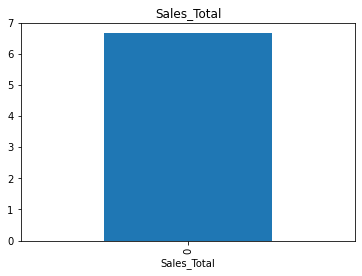

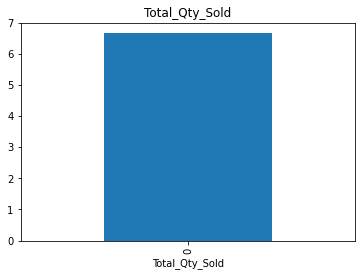

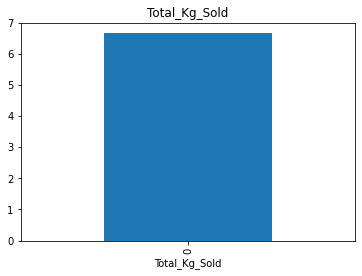

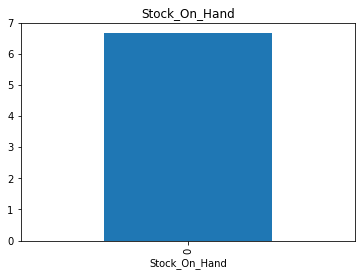

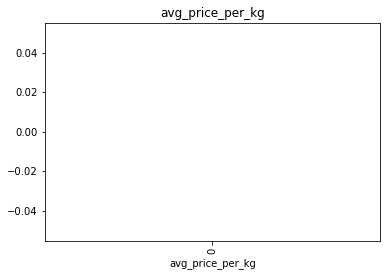

In [12]:
#Now let's see whether the missing data has some impact on the target variable.
#For this we'll convert all missing values in every feature as 1 and try to see their impact on avg_price_per_kg.
features = df_train.columns
for feature in features:
    data = df_train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['avg_price_per_kg'].median().plot.bar()
    plt.title(feature)
    plt.show()

###  Numerical/Categorical Data

In [13]:
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
print('Number of numerical features:',len(numerical_features))
df_train[numerical_features].head()

Number of numerical features: 8


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50


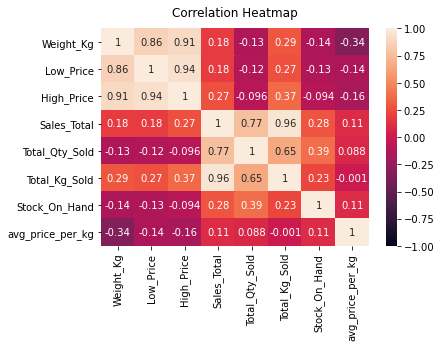

In [14]:
#Let's see how these features influence our target variable using a heatmap.
#correlation matrix
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
price = ['Low_Price','High_Price','Sales_Total','Total_Kg_Sold', 'Total_Qty_Sold']

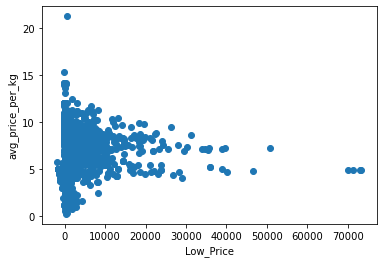

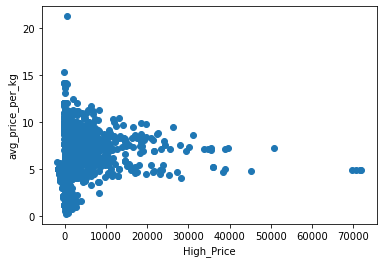

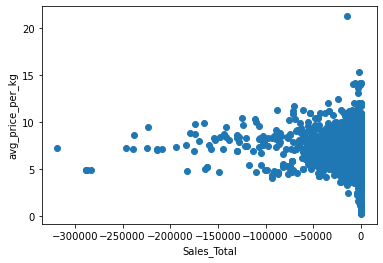

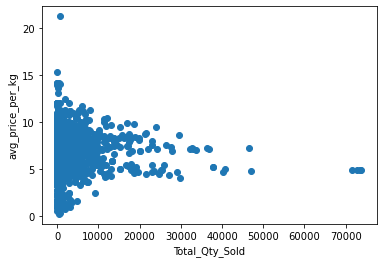

In [16]:
#Let's see the impact of these price features with respect to avg_price_per_kg
for feature in price:
    if feature!='Total_Kg_Sold':
        data = df_train.copy()
        data[feature] = data['Total_Kg_Sold']-data[feature] 
        plt.scatter(data[feature],data['avg_price_per_kg'])
        plt.xlabel(feature)
        plt.ylabel('avg_price_per_kg')
        plt.show()

In [17]:
#Finally let's look at our categorical features.
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']
print('Number of Categorical Features:',len(categorical_features))
df_train[categorical_features].head()

Number of Categorical Features: 5


,Province,Container,Size_Grade,Commodities,Date
1,CAPE,M4183,1L,APPLE GOLDEN DELICIOUS,2020-09-09
7,CAPE,JG110,2M,APPLE GOLDEN DELICIOUS,2020-04-14
24,W.CAPE-BERGRIVER ETC,JE090,2S,APPLE GOLDEN DELICIOUS,2020-04-16
40,CAPE,M4183,1S,APPLE GOLDEN DELICIOUS,2020-05-04
69,EASTERN CAPE,IA400,1S,APPLE GOLDEN DELICIOUS,2020-09-28


In [18]:
#Let's check how many categories are present in each feature.
for feature in categorical_features:
    print(feature,'has',len(df_train[feature].unique()),'categories')

Province has 7 categories
Container has 11 categories
Size_Grade has 10 categories
Commodities has 1 categories
Date has 147 categories


In [19]:
for feature in categorical_features:
    print(feature,':',df_train[feature].unique())

Province : ['CAPE' 'W.CAPE-BERGRIVER ETC' 'EASTERN CAPE' 'NATAL' 'WEST COAST'
 'TRANSVAAL' 'ORANGE FREE STATE']
Container : ['M4183' 'JG110' 'JE090' 'IA400' 'EC120' 'AC030' 'M6125' 'EF120' 'DT063'
 'M9125' 'EG140']
Size_Grade : ['1L' '2M' '2S' '1S' '1M' '1X' '2L' '2U' '2X' '1U']
Commodities : ['APPLE GOLDEN DELICIOUS']
Date : ['2020-09-09' '2020-04-14' '2020-04-16' '2020-05-04' '2020-09-28'
 '2020-03-13' '2019-12-30' '2020-08-05' '2020-07-21' '2020-04-22'
 '2020-02-25' '2020-08-06' '2020-08-25' '2020-07-01' '2020-07-09'
 '2020-02-08' '2020-03-25' '2020-09-23' '2020-02-11' '2020-07-13'
 '2020-04-23' '2020-05-19' '2020-04-28' '2020-03-30' '2020-02-21'
 '2020-08-13' '2020-08-04' '2020-06-13' '2020-02-01' '2020-07-27'
 '2020-07-23' '2020-07-22' '2020-07-16' '2020-04-01' '2020-02-27'
 '2020-03-05' '2020-09-02' '2020-04-29' '2020-05-14' '2020-08-24'
 '2020-04-21' '2020-06-17' '2020-08-14' '2020-03-14' '2020-08-11'
 '2020-01-16' '2020-03-31' '2020-07-10' '2020-06-01' '2020-06-27'
 '2019-12-23

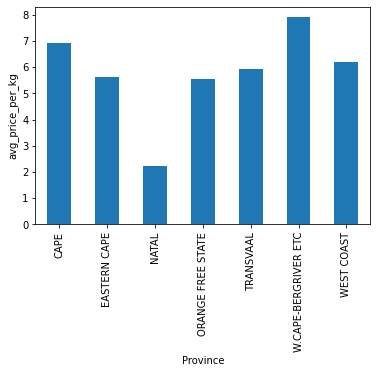

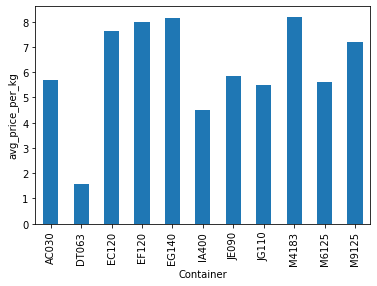

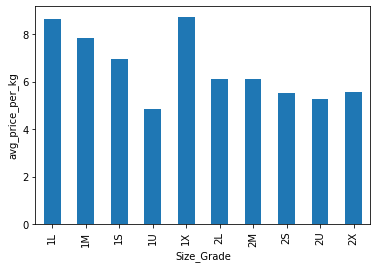

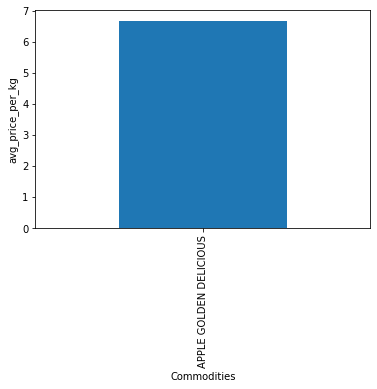

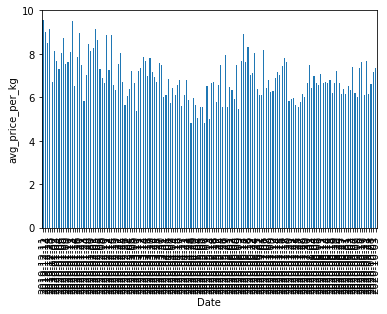

In [20]:
#Let's oberserve the relationship between these categorical features and avg_price_per_kg using barplots and boxplots.
for feature in categorical_features:
    data = df_train.copy()
    data.groupby(feature)['avg_price_per_kg'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('avg_price_per_kg')
    plt.show()

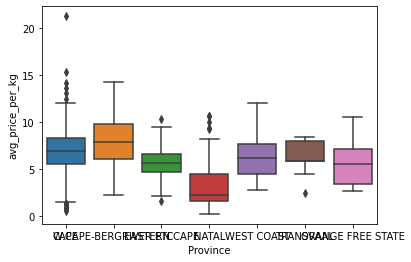

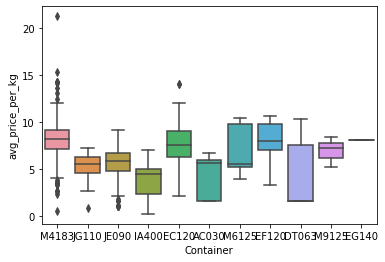

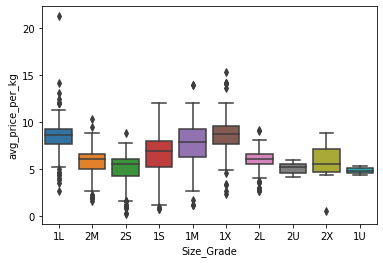

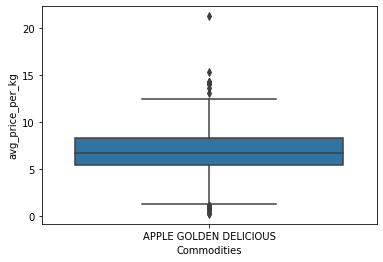

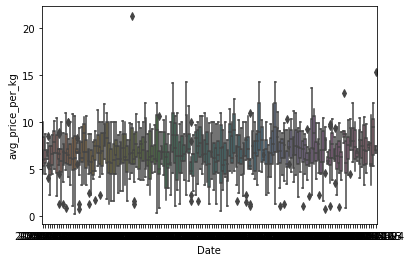

In [21]:
#Let's use boxplots for a better visualization.
for feature in categorical_features:
    sns.boxplot(x=feature,y='avg_price_per_kg',data=df_train)
    plt.xlabel(feature)
    plt.show()

###  Outliers

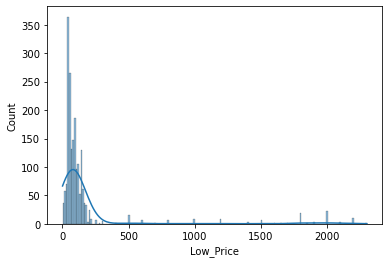

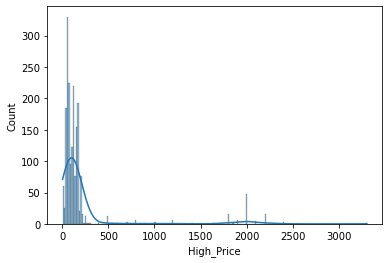

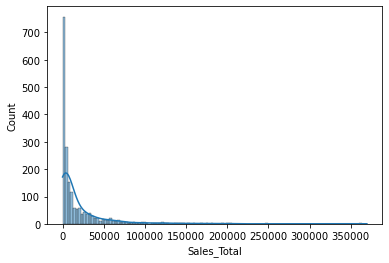

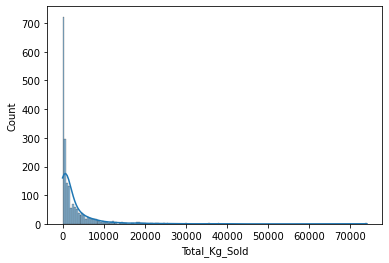

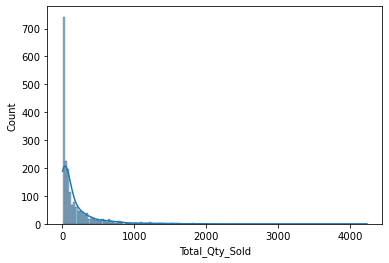

In [22]:
for feature in price:
    sns.histplot(df_train[feature],kde=True)
    plt.show()

##  Feature Engineering

###  Handling Missing Values

In [23]:
#Let's see how we can deal with the missing values in categorical_features.
nan_cat_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']
for feature in nan_cat_features:
    print("{}: {}% missing values".format(feature,np.round(df_train[feature].isnull().mean()*100,2)))

There are 2 ways by which we can handle missing values in categorical features.

**1. Frequent Catergory Imputation** - In this method we simply replace the NaN values with the most frequent category present in the feature. For example in the feature 'Alley', we can simply replace nan values with 'Paved' since it's the most dominant category present in that feature. This method is easy to implement and is fast however if there are many NaN values,the most frequent labels are going to be represented more often and also lead to some distortion between variables.We will be using this technique since it is much faster.

**2. Adding a feature to catch NaN** - In this method we add new features for those features having NaN values and replace the data with 1 where we encounter missing value and 0 where there's no missing value. Later on we can drop the original features which are having NaN values during feature selection. An alternate technique is to replace all the missing values with the label 'Missing' This will therefore create a new category within the feature.

In [24]:
#Let's create a function which impute missing values in every categorical feature with the most frequent category in that feature.
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [25]:
nan_cat_features_new = ['avg_price_per_kg']

In [26]:
for feature in nan_cat_features_new:
    impute_nan(df_train,feature)

In [27]:
df_train[nan_cat_features_new].isnull().sum() # Now there's no missing data in categorical features.

avg_price_per_kg    0
dtype: int64

In [28]:
#Similarly for the test dataset.
nan_cat_features = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes=='O']
for feature in nan_cat_features:
    print('{}: {}% missing values'.format(feature,np.round(df_test[feature].isnull().mean()*100,2)))

In [29]:
#nan_cat_features_new = ['']

In [30]:
#def impute_test_nan(df,variable):
    #most_frequent_category = df[variable].value_counts().index[0]
    #df[variable].fillna(most_frequent_category,inplace=True)

In [31]:
#for feature in nan_cat_features_new:
    #impute_test_nan(df_test,feature)

In [32]:
#df_test[nan_cat_features_new].isnull().sum()

In [33]:
#Let's see how we can deal with missing values in numerical features.
nan_num_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']
for feature in nan_num_features:
    print('{}: {}% missing values'.format(feature,np.round(df_train[feature].isnull().mean()*100,2)))

In [34]:
for feature in nan_num_features:
    median = df_train[feature].median()
    df_train[feature].fillna(median,inplace=True)

In [35]:
df_train[nan_num_features].isnull().sum() #Now there's no NaN values.

Series([], dtype: float64)

In [36]:
#Similarly for the test dataset.
nan_num_features = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='O']
for feature in nan_num_features:
    print('{}: {}% missing values'.format(feature,np.round(df_test[feature].isnull().mean()*100,2)))

In [37]:
for feature in nan_num_features:
    median = df_test[feature].median()
    df_test[feature].fillna(median,inplace=True)
df_test[nan_num_features].isnull().sum()

Series([], dtype: float64)

In [38]:
#Let's deal with missing values for DateTime variables.
#Here we will convert the datetime variables into how many years old which will prove to more valuable.
#for feature in ['']:
    #df_train[feature] = df_train['']-df_train[feature]

In [39]:
#df_train[['']].head()

In [40]:
#Similarly for test dataset.
#for feature in ['']:
    #df_test[feature] = df_test['']-df_test[feature]

In [41]:
#df_test[['']].head()

### Feature Transformation

In [42]:
#Ok so let's use a Q-Q plot to check whether our numerical features are gaussian distributed.
import pylab
import scipy.stats as stat

def plot_data(dataset,features):
    for feature in features:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        dataset[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(dataset[feature],dist='norm',plot=pylab)
        plt.title(feature)
        plt.show()

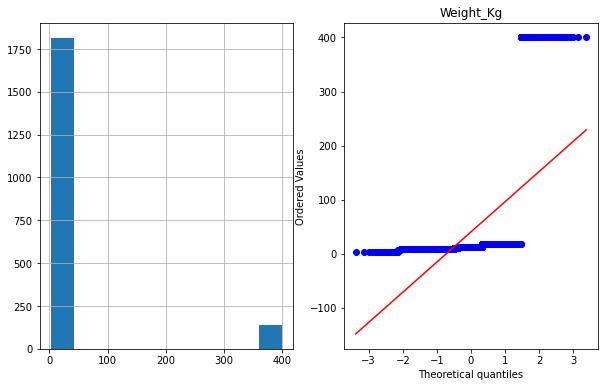

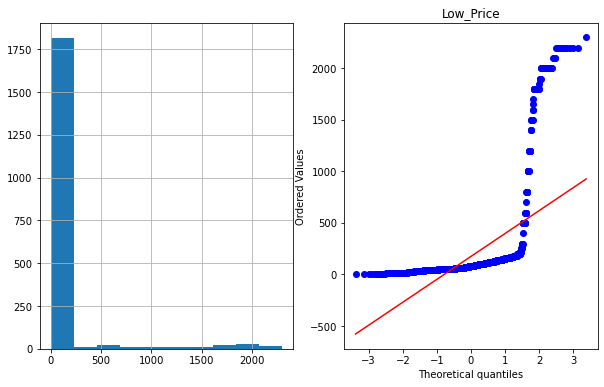

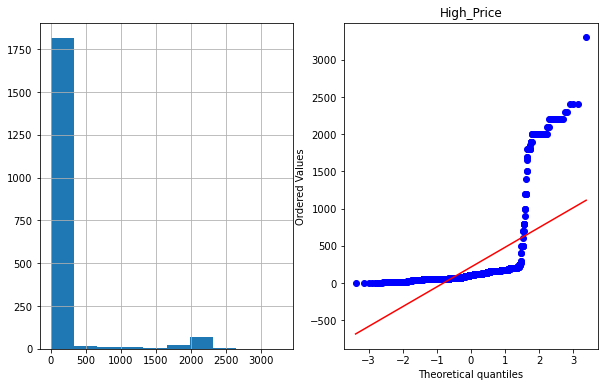

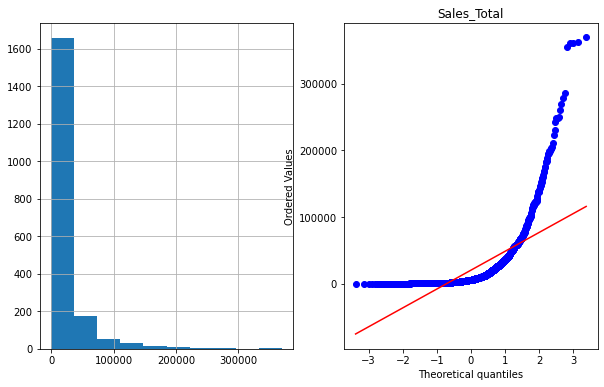

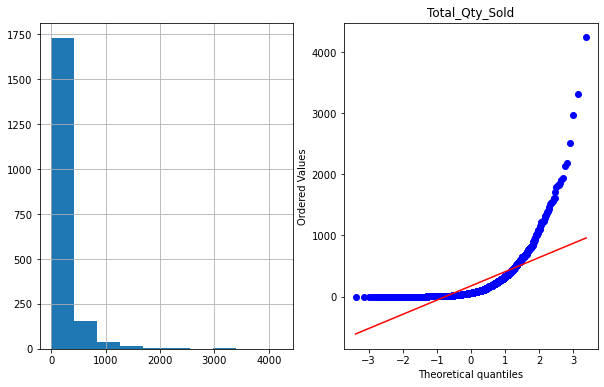

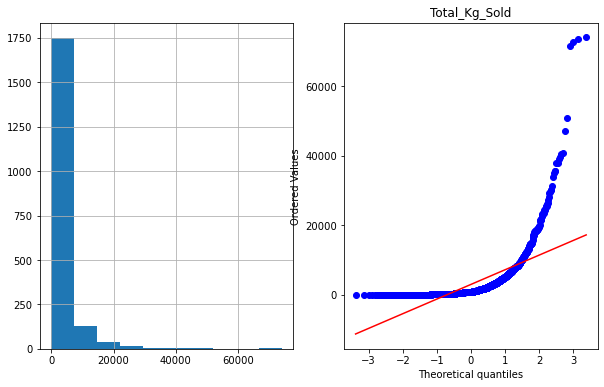

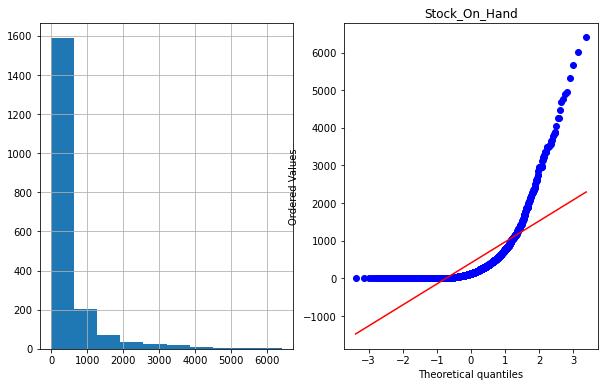

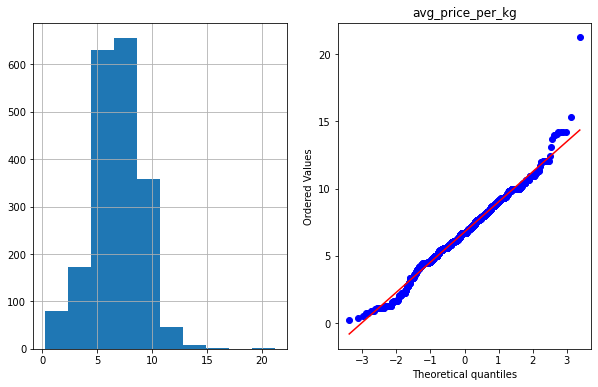

In [43]:
#If we have a straight line passing through most points in a Q-Q then the feature is normally distributed.
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
plot_data(df_train,numerical_features)

In [44]:
#As we have seen in EDA and from the Q-Q plots above that some of the features are skewed. We need to fix this with Logarithmic Transformation.
skewed_feature = ['Weight_Kg']

for feature in skewed_feature:
    df_train[feature] = np.log(df_train[feature])

In [45]:
#similarly for the test dataset.
skewed_feature = ['Weight_Kg']

for feature in skewed_feature:
    df_test[feature] = np.log(df_test[feature])

In [46]:
#df_train.drop('Index',axis=1,inplace=True)

In [47]:
df_test.drop('Index',axis=1,inplace=True)

###  Encoding Categorical Features  


In [48]:
categorical_variables = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']

In [49]:
main_df=df_train.copy()

In [50]:
#Now we'll combine the test data with the training data row-wise to onehotencode the features.
#The reason we're combining the 2 dataframes is that there are some new categories in the test dataset.
final_df = pd.concat([main_df,df_test],axis=0)

In [51]:
#Let's create a function to encode the categorical features.
def onehot_cols(cols): #The function takes a list of categorcial features/columns.
    df_final=final_df
    i=0
    
    for fields in cols:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [52]:
final_df['avg_price_per_kg'] #Since there's no avg_price_per_kg in test dataframe that's why we have some NaN values.

1      8.51
7      4.55
24     6.11
40     4.51
69     4.50
       ... 
680     NaN
681     NaN
682     NaN
683     NaN
684     NaN
Name: avg_price_per_kg, Length: 2637, dtype: float64

In [53]:
final_df = onehot_cols(categorical_variables)

Province
Container
Size_Grade
Commodities
Date


In [54]:
final_df.shape

(2637, 179)

In [55]:
final_df = final_df.loc[:,~final_df.columns.duplicated()] #Remove duplicated features.

In [56]:
final_df.shape

(2637, 179)

In [57]:
final_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST,DT063,EC120,EF120,EG140,IA400,JE090,JG110,M4183,M6125,M9125,1M,1S,1U,1X,2L,2M,2S,2U,2X,2019-12-12,2019-12-14,2019-12-23,2019-12-30,2020-01-02,2020-01-03,2020-01-04,2020-01-06,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-13,2020-01-14,2020-01-16,2020-01-20,2020-01-21,2020-01-23,2020-01-24,2020-01-28,2020-01-30,2020-02-01,2020-02-03,2020-02-05,2020-02-06,2020-02-08,2020-02-10,2020-02-11,2020-02-12,2020-02-14,2020-02-15,2020-02-19,2020-02-21,2020-02-22,2020-02-25,2020-02-26,2020-02-27,2020-03-04,2020-03-05,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-16,2020-03-17,2020-03-20,2020-03-23,2020-03-25,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-06,2020-04-07,2020-04-09,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-21,2020-04-22,2020-04-23,2020-04-28,2020-04-29,2020-04-30,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-09,2020-05-13,2020-05-14,2020-05-18,2020-05-19,2020-05-22,2020-05-25,2020-05-26,2020-05-27,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-08,2020-06-09,2020-06-12,2020-06-13,2020-06-17,2020-06-18,2020-06-19,2020-06-22,2020-06-24,2020-06-25,2020-06-27,2020-07-01,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-25,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-18,2020-08-19,2020-08-20,2020-08-24,2020-08-25,2020-08-27,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-07,2020-09-09,2020-09-16,2020-09-17,2020-09-19,2020-09-21,2020-09-23,2020-09-28,2020-10-01,2020-10-03
1,2.906901,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,2.397895,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,2.197225,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,2.906901,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,5.991465,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
#Sepearating our final train and test datasets.
df_Train = final_df.iloc[:1952,:]
df_Test = final_df.iloc[1952:,:]

In [59]:
df_Train

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST,DT063,EC120,EF120,EG140,IA400,JE090,JG110,M4183,M6125,M9125,1M,1S,1U,1X,2L,2M,2S,2U,2X,2019-12-12,2019-12-14,2019-12-23,2019-12-30,2020-01-02,2020-01-03,2020-01-04,2020-01-06,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-13,2020-01-14,2020-01-16,2020-01-20,2020-01-21,2020-01-23,2020-01-24,2020-01-28,2020-01-30,2020-02-01,2020-02-03,2020-02-05,2020-02-06,2020-02-08,2020-02-10,2020-02-11,2020-02-12,2020-02-14,2020-02-15,2020-02-19,2020-02-21,2020-02-22,2020-02-25,2020-02-26,2020-02-27,2020-03-04,2020-03-05,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-16,2020-03-17,2020-03-20,2020-03-23,2020-03-25,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-06,2020-04-07,2020-04-09,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-21,2020-04-22,2020-04-23,2020-04-28,2020-04-29,2020-04-30,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-09,2020-05-13,2020-05-14,2020-05-18,2020-05-19,2020-05-22,2020-05-25,2020-05-26,2020-05-27,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-08,2020-06-09,2020-06-12,2020-06-13,2020-06-17,2020-06-18,2020-06-19,2020-06-22,2020-06-24,2020-06-25,2020-06-27,2020-07-01,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-25,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-18,2020-08-19,2020-08-20,2020-08-24,2020-08-25,2020-08-27,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-07,2020-09-09,2020-09-16,2020-09-17,2020-09-19,2020-09-21,2020-09-23,2020-09-28,2020-10-01,2020-10-03
1,2.906901,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,2.397895,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,2.197225,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,2.906901,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,5.991465,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [60]:
df_Test

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST,DT063,EC120,EF120,EG140,IA400,JE090,JG110,M4183,M6125,M9125,1M,1S,1U,1X,2L,2M,2S,2U,2X,2019-12-12,2019-12-14,2019-12-23,2019-12-30,2020-01-02,2020-01-03,2020-01-04,2020-01-06,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-13,2020-01-14,2020-01-16,2020-01-20,2020-01-21,2020-01-23,2020-01-24,2020-01-28,2020-01-30,2020-02-01,2020-02-03,2020-02-05,2020-02-06,2020-02-08,2020-02-10,2020-02-11,2020-02-12,2020-02-14,2020-02-15,2020-02-19,2020-02-21,2020-02-22,2020-02-25,2020-02-26,2020-02-27,2020-03-04,2020-03-05,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-16,2020-03-17,2020-03-20,2020-03-23,2020-03-25,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-06,2020-04-07,2020-04-09,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-21,2020-04-22,2020-04-23,2020-04-28,2020-04-29,2020-04-30,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-09,2020-05-13,2020-05-14,2020-05-18,2020-05-19,2020-05-22,2020-05-25,2020-05-26,2020-05-27,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-08,2020-06-09,2020-06-12,2020-06-13,2020-06-17,2020-06-18,2020-06-19,2020-06-22,2020-06-24,2020-06-25,2020-06-27,2020-07-01,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-25,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-18,2020-08-19,2020-08-20,2020-08-24,2020-08-25,2020-08-27,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-07,2020-09-09,2020-09-16,2020-09-17,2020-09-19,2020-09-21,2020-09-23,2020-09-28,2020-10-01,2020-10-03
0,2.484907,128.0,136.0,5008.0,38,456.0,0,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.906901,220.0,220.0,1760.0,8,146.4,2,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.484907,120.0,120.0,720.0,6,72.0,45,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.906901,160.0,160.0,160.0,1,18.3,8,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.906901,140.0,160.0,14140.0,100,1830.0,19,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [61]:
df_Test.drop('avg_price_per_kg',axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##  Modelling  


###  Splitting the training data into train and test set for checking accuracy within the training set.

In [62]:
X = df_Train.drop('avg_price_per_kg',axis=1)
Y = df_Train['avg_price_per_kg']

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.01,random_state=60)

###  Modelling using XgBoost Regressor

In [128]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([11.093669 ,  6.142984 ,  5.0009637,  4.4267826,  7.562438 ,
        5.463569 ,  2.916447 ,  7.617296 ,  5.9478664, 11.131117 ,
        9.060102 ,  7.0379033,  6.0909777,  7.610105 ,  8.574095 ,
        9.283813 ,  5.5850887,  9.269164 ,  7.728336 ,  6.1137037],
      dtype=float32)

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test,y_pred)
score

0.9859222790634355

In [130]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.2435335575285051


###  Hyperparameter optimization  


In [131]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]

# Define the grid of hyperparameters to search

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

Set up the random search with 4-fold cross validation  
from sklearn.model_selection import RandomizedSearchCV  
random_cv = RandomizedSearchCV(estimator=xgb,  
            param_distributions=hyperparameter_grid,  
            cv=5,n_iter=50,  
            scoring='neg_mean_absolute_error',n_jobs = 4,  
            verbose=5,   
            return_train_score=True,  
            random_state=42)

In [132]:
#random_cv.fit(X_train,y_train)

In [133]:
#random_cv.best_estimator_

In [134]:
xgb = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [135]:
xgb.fit(X_train,y_train)

[20:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
#y_pred = xgb.predict(df_test)
#y_pred

## Random Forest Regression Model

### Training

In [137]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

### Testing
To evaluate the performance of our model, we can report the mean square error or plot predicted output vs expected output.

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.5994240477535333


Actual vs Expected

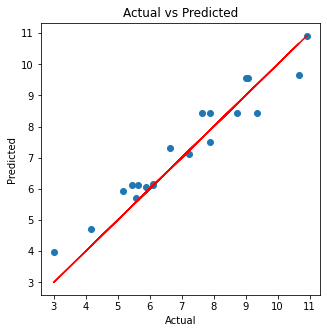

In [111]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

### Random forests vs. Other Models

In [143]:
# Fit regression decision tree model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_test,y_test)

DecisionTreeRegressor(max_depth=5)

In [144]:
# Fit linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(X_test,y_test)

LinearRegression()

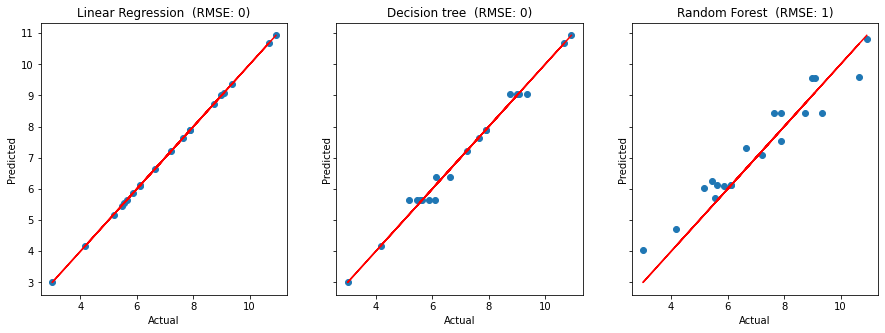

In [145]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [LR.predict(X_test), DT.predict(X_test), RF.predict(X_test)]
title = ['Linear Regression','Decision tree', 'Random Forest']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

### Tuning Model Hyperparameters 

In most cases, the default hyperpameter values do not offer the best model performance. In such cases, we have to tune model hyperparameters to yield the the best performing model.

Let's make some changes to the `n_estimators` parameter and compare the results:

In [146]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [147]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [148]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [149]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

#### Model Evaluation

Actual vs Expected

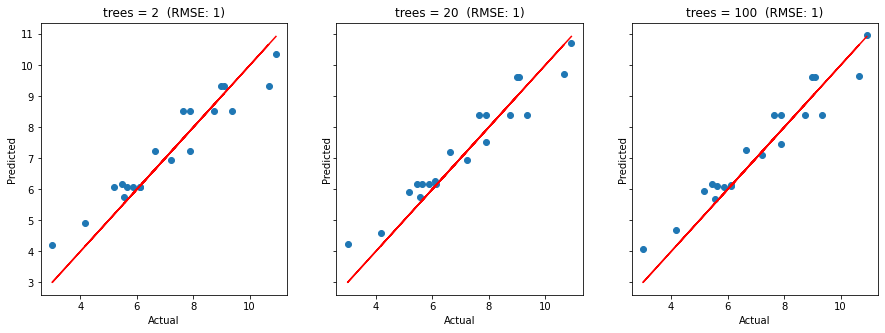

In [150]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(X_test), forest_2.predict(X_test), forest_3.predict(X_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

In [123]:
test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [124]:
submission = pd.DataFrame({"Commodities":test["Commodities"],"avg_price_per_kg":y_pred})
submission.to_csv('submission.csv',index=False)

ValueError: array length 20 does not match index length 685

## 7. Conclusion  
The model gives pretty decent results using XgBoost with further improvements to be made. The Random Forest error is higher.